In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from scipy.stats import skew
from sklearn.preprocessing import power_transform
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

Input features: Runs, At Bats, Hits, Doubles,
    Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, 
    Earned Run Average (ERA), Complete Games, Shutouts, Saves and Errors

In [2]:
df=pd.read_csv("C:/Users/91954/data science pg program/ML/baseball.csv")

df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
dfc=df

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [17]:
df.info()#checking null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [16]:
(df.nunique())#we seen the unique values

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [8]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [15]:
df['SHO'].unique()

array([ 8, 12, 10,  9,  4, 13, 15, 21,  7, 14, 18,  6], dtype=int64)

In [11]:
df['H'].unique()

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [19]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [35]:
df.loc[df['E']=='']#checking blank spaces of every columns

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


In [40]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [43]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [44]:
#we can see std win are very low,count is equal,mean value and 50% data has not much difference,we cant see much differewnce in value or we
#can say that the difference is not much to look at in any of the data.

In [46]:
len(df)

30

visualization

In [45]:
Y=df['W']
X=df.drop(columns = ['W'])

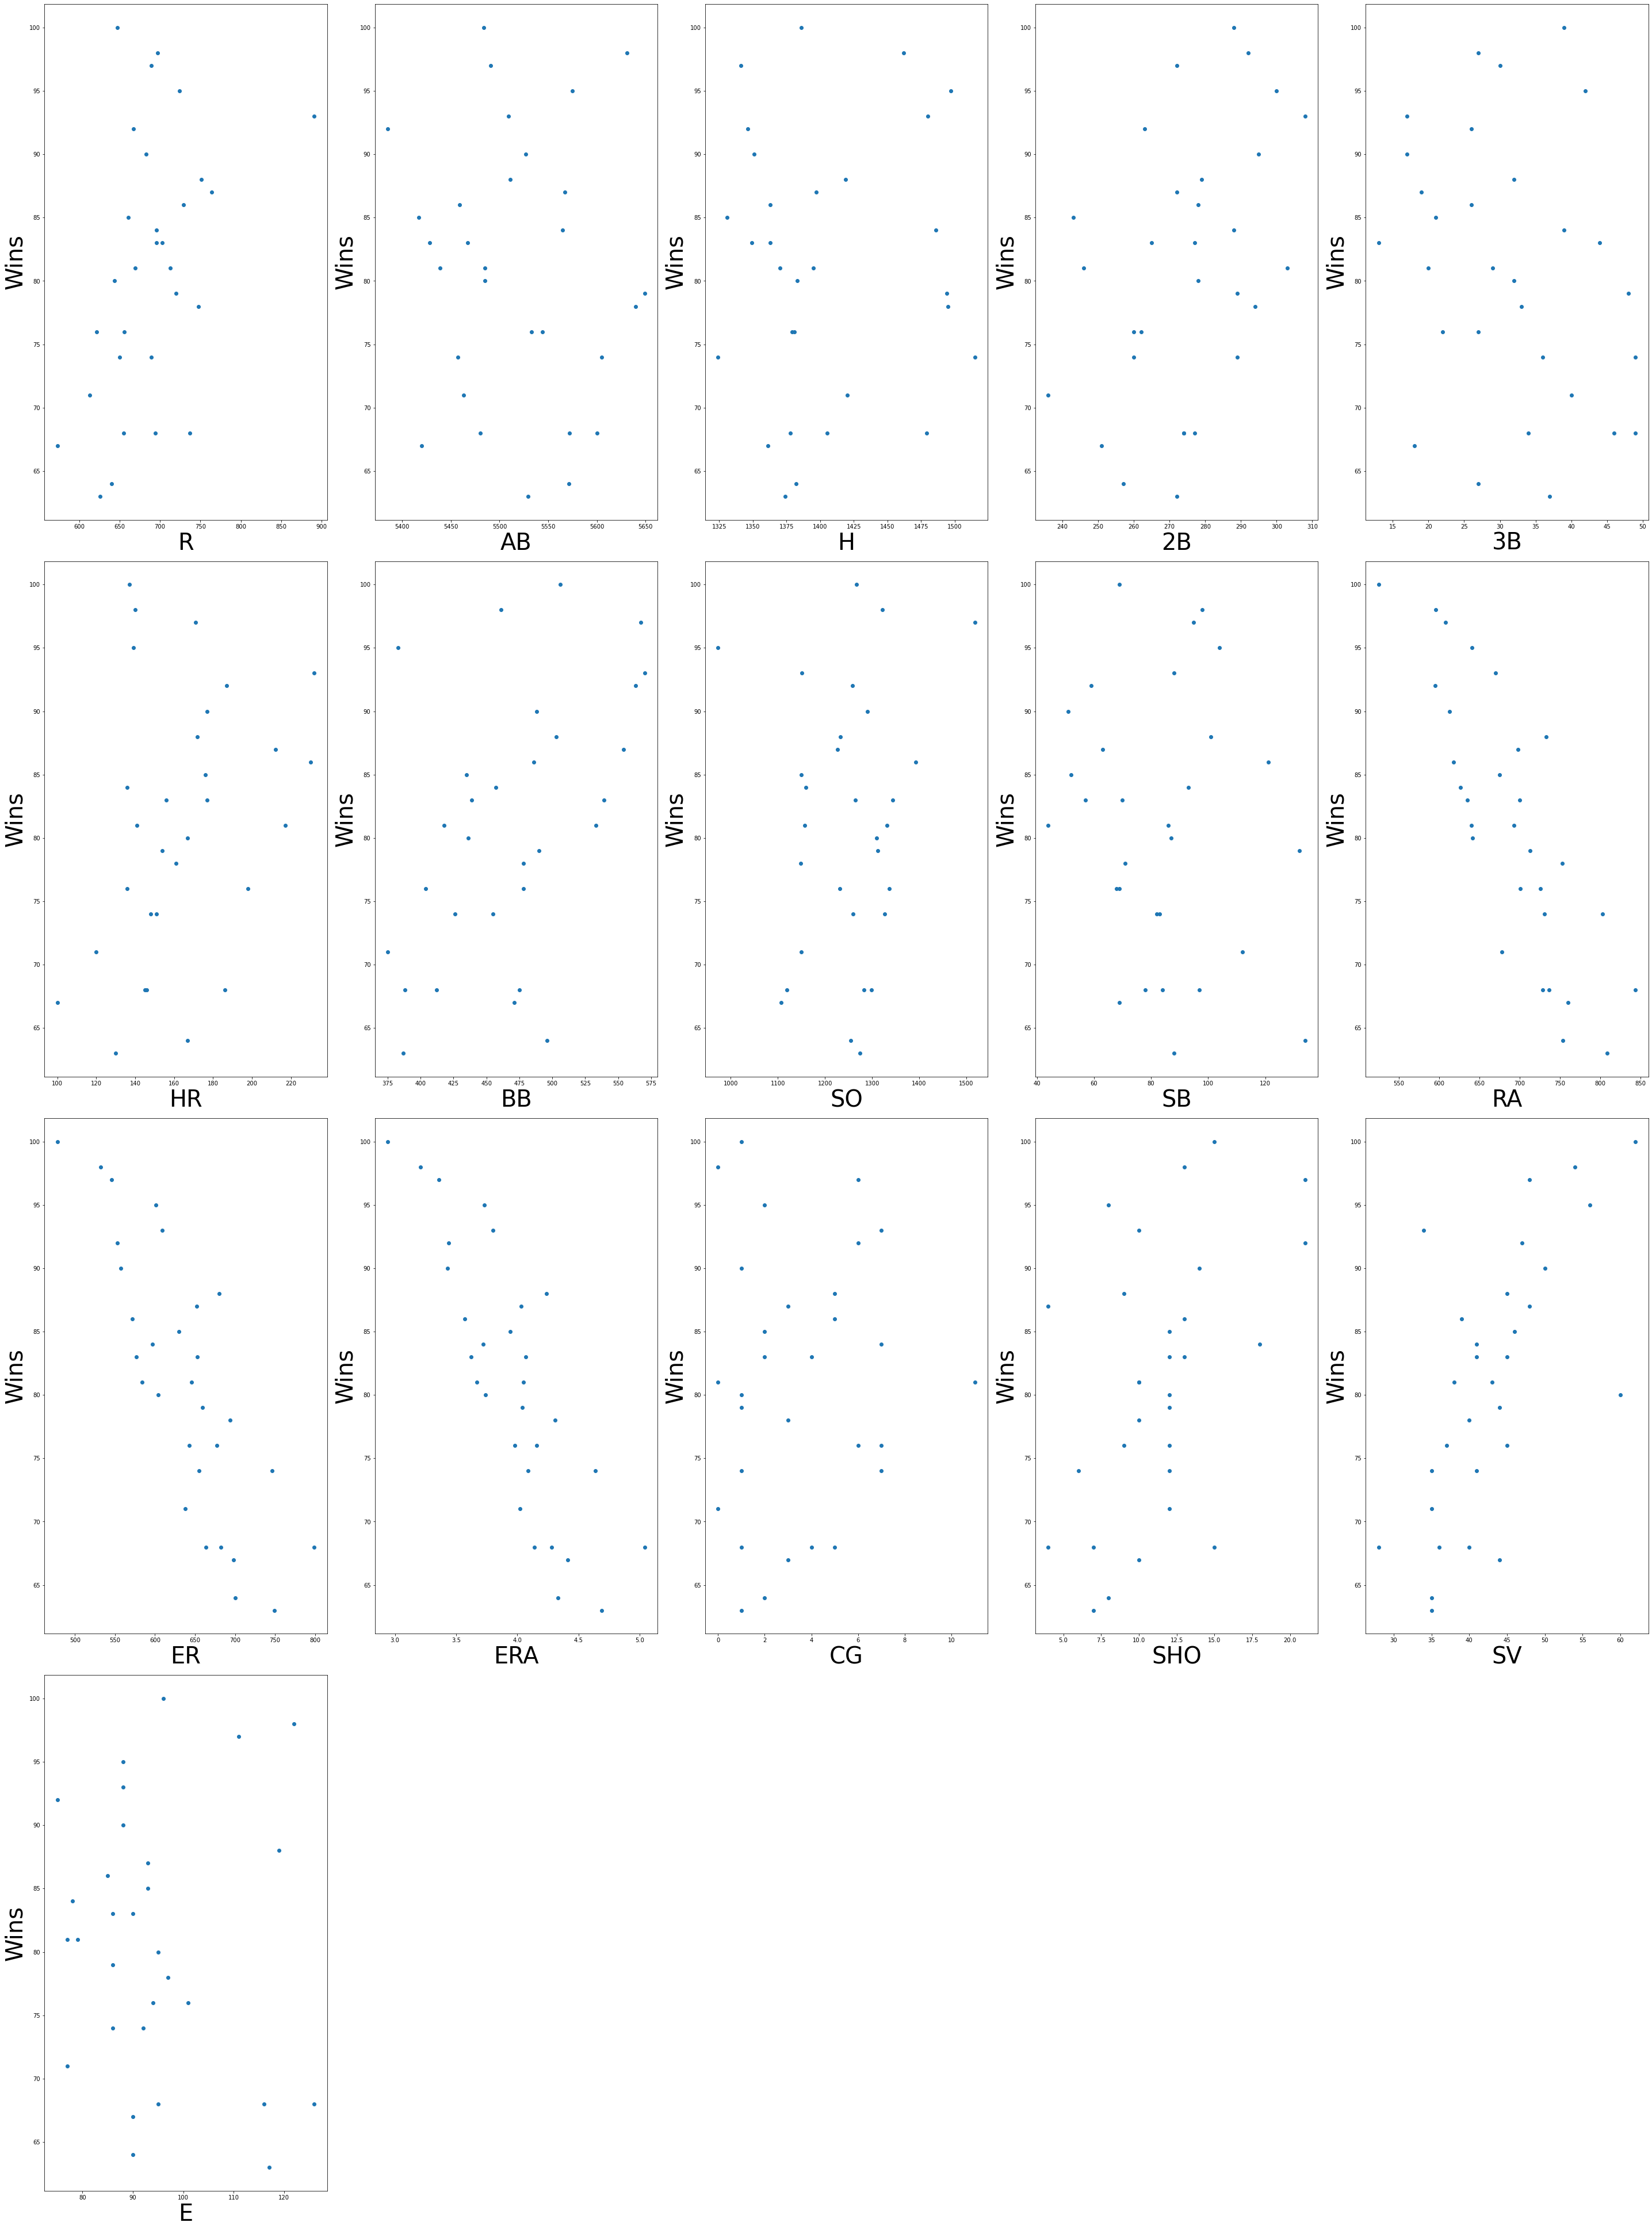

In [48]:
plt.figure(figsize=(40,80),facecolor='white')
plotnumber = 1

for  column in X:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        plt.scatter(df[column],Y)
        plt.xlabel(column,fontsize=40)
        plt.ylabel('Wins',fontsize=40)
         
    plotnumber+=1
plt.tight_layout()

In [50]:
#we can conclude from this plot that
#Era,ra, Er have a negative relationship with wins and sv is showing a positive relationship with win 
#we cannot interpret much from other data as it doesn't show much evidence of any relationship
#lets visualize more

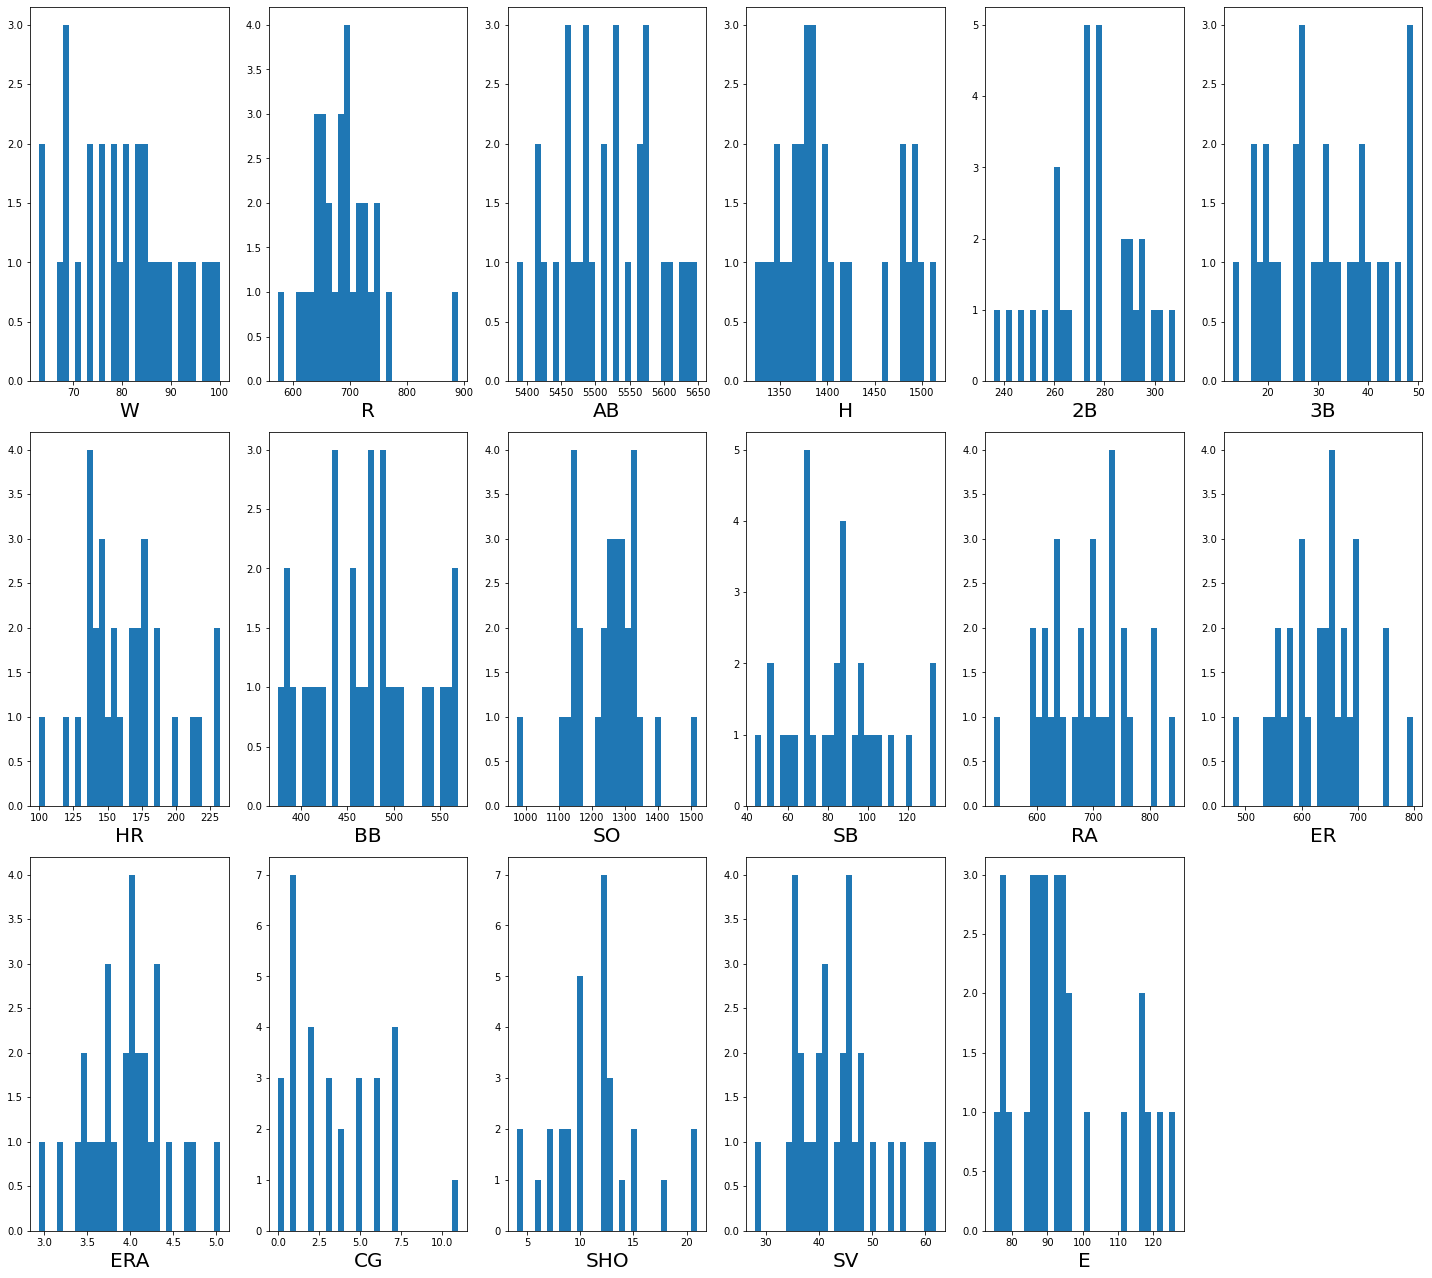

In [51]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in df:
    if plotnumber<=30:
        ax=plt.subplot(6,6,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [52]:
#we can see that the data is looking mostly normally distributed
#lets interpret with more evidence with next plot

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

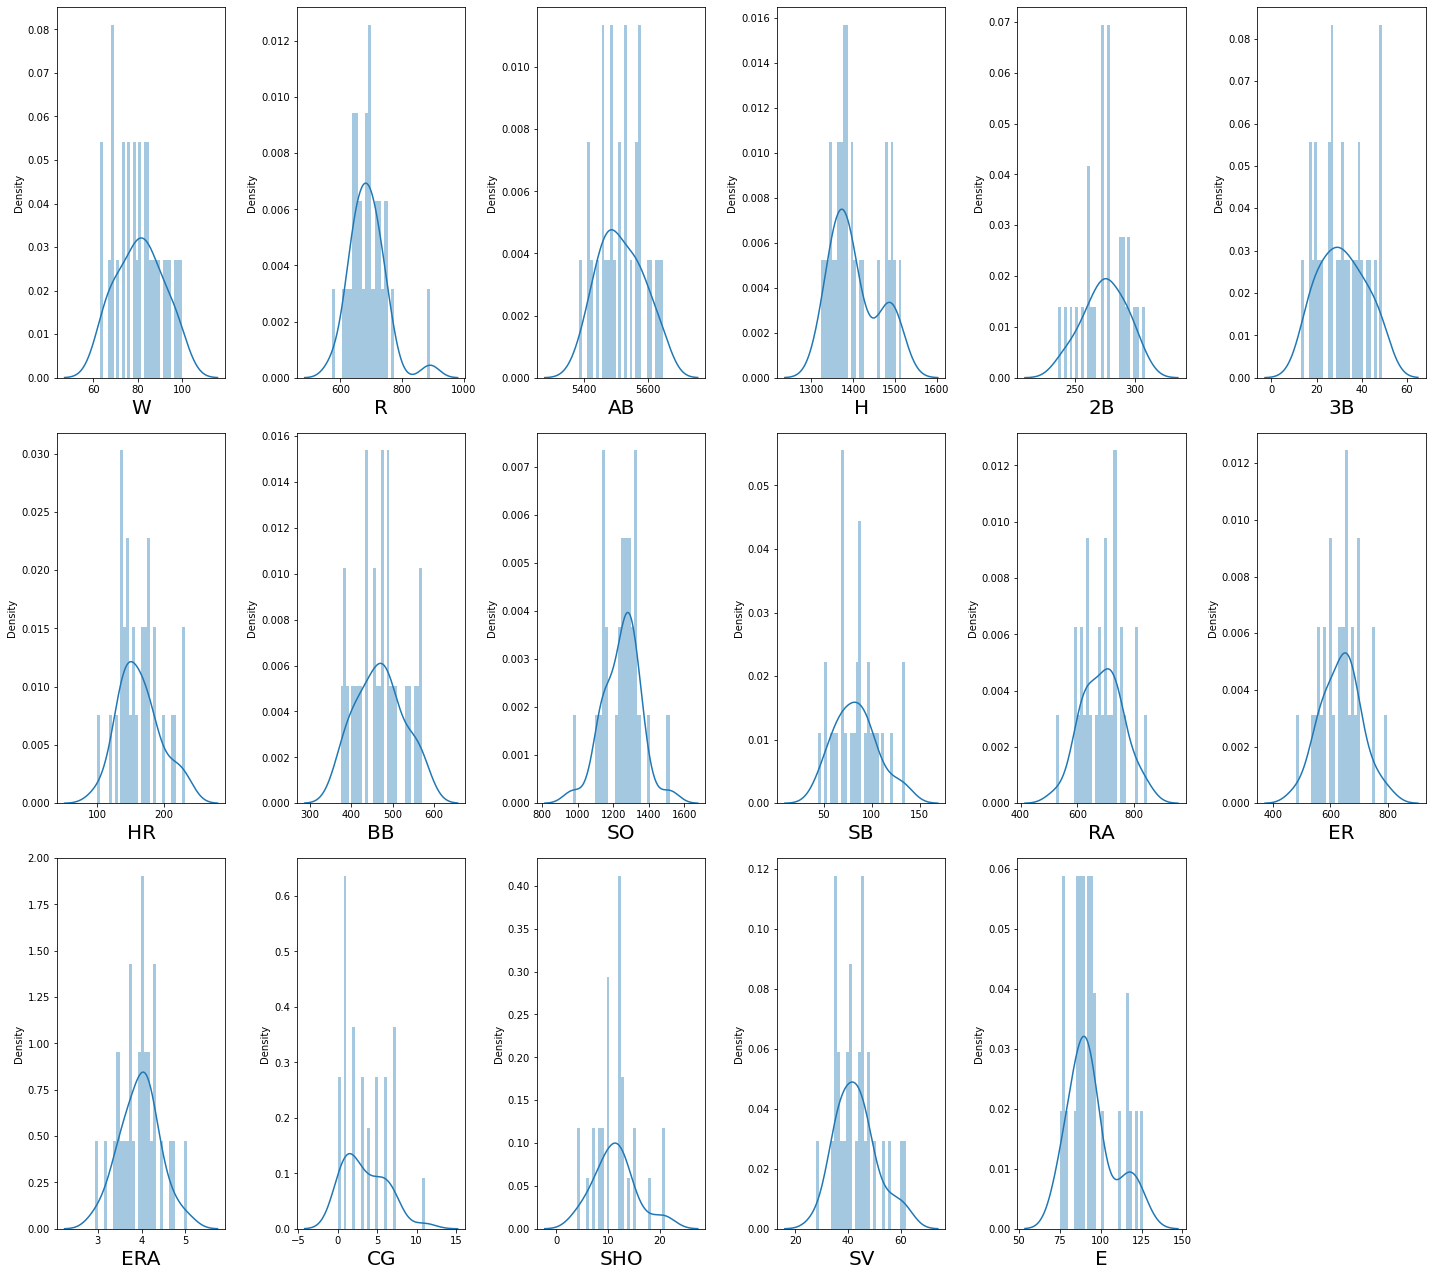

In [55]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in df:
    if plotnumber<=30:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [56]:
#now we can have a cklear picture 
#we can see win are mostly normally distributed with minimal skewness
#we can also interpret other columns
#as R,H,HR,SB,CG,SHO,SV,E has some rightskewness,
#AB,2B,3B,BB,RA is are close to normally distributed plot
#we can see that ER,ERA show the most accurate distplot or we can say a normally distributed plot

3.62    1
4.31    1
3.57    1
3.74    1
3.94    1
4.02    1
5.04    1
3.67    1
4.24    1
4.69    1
4.41    1
4.16    1
3.43    1
4.14    1
4.03    1
3.21    1
4.28    1
3.36    1
4.04    1
3.80    1
3.72    1
3.44    1
4.07    1
4.64    1
2.94    1
3.73    1
4.09    1
4.33    1
4.05    1
3.98    1
Name: ERA, dtype: int64


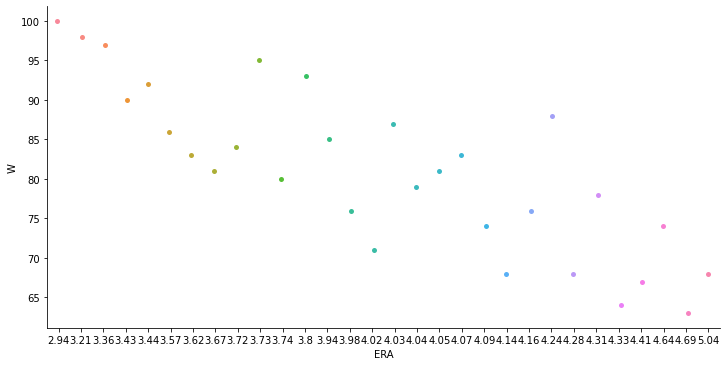

In [58]:
sns.catplot(x='ERA',y='W',data=df,aspect=2)
print(df["ERA"].value_counts())

In [ ]:
# we can interpret that wins have a inverse relation with ERA

577    1
643    1
700    1
572    1
698    1
630    1
694    1
557    1
746    1
553    1
680    1
677    1
546    1
609    1
799    1
478    1
682    1
604    1
601    1
664    1
597    1
532    1
659    1
749    1
655    1
653    1
652    1
584    1
646    1
638    1
Name: ER, dtype: int64


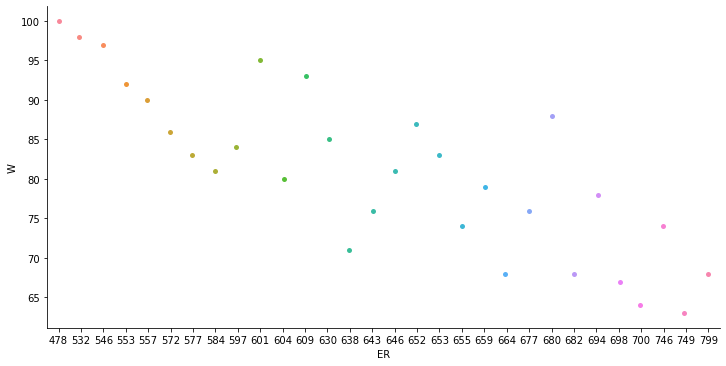

In [66]:
sns.catplot(x='ER',y='W',data=df,aspect=2)
print(df["ER"].value_counts())

In [65]:
#we can see it also shows an inverse relation with ER

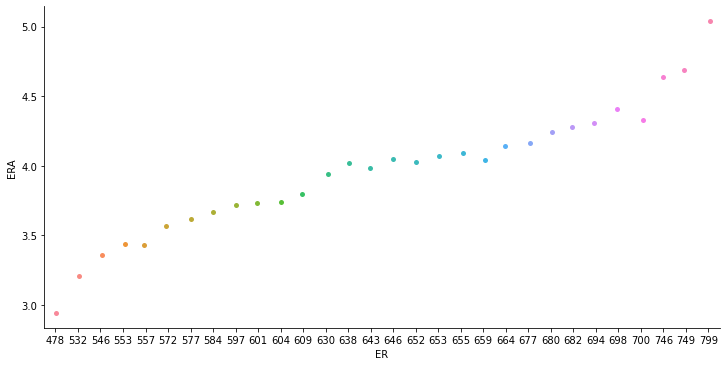

In [68]:
sns.catplot(x='ER',y='ERA',data=df,aspect=2)


In [69]:
#as we can see this two are giving a good relation ship which prodsuce positively growing line

In [71]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

35    4
45    3
41    3
40    2
44    2
48    2
47    1
60    1
56    1
28    1
54    1
50    1
34    1
46    1
43    1
39    1
38    1
37    1
36    1
62    1
Name: SV, dtype: int64


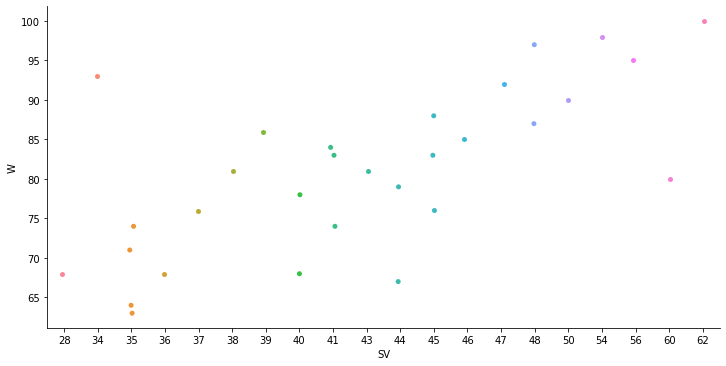

In [73]:
sns.catplot(x='SV',y='W',data=df,aspect=2)
print(df["SV"].value_counts())

In [74]:
#we can see that some how it has a good relation with wins

correlation 

In [76]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

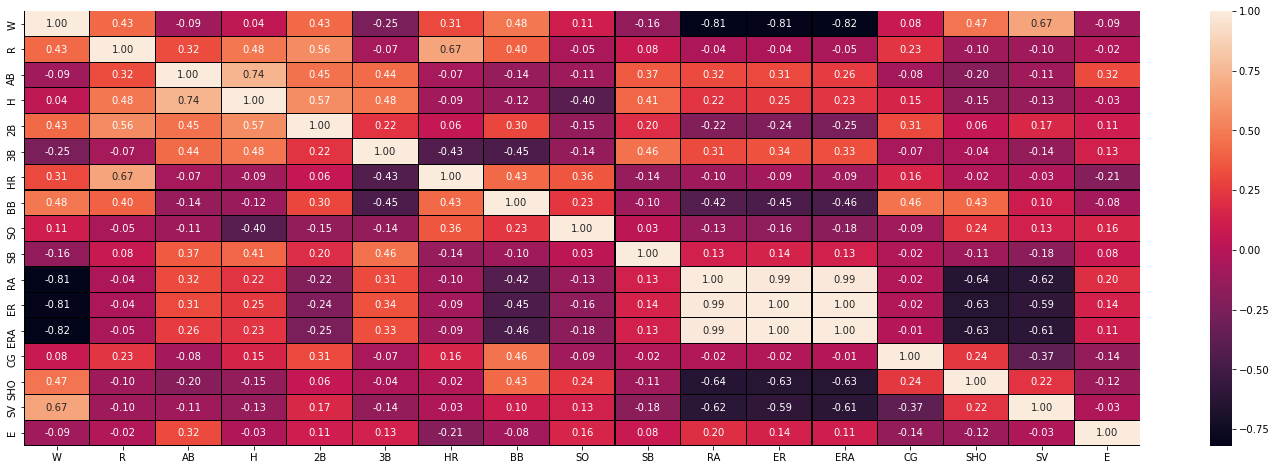

In [77]:
plt.figure(figsize=(25,8),facecolor='white')
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

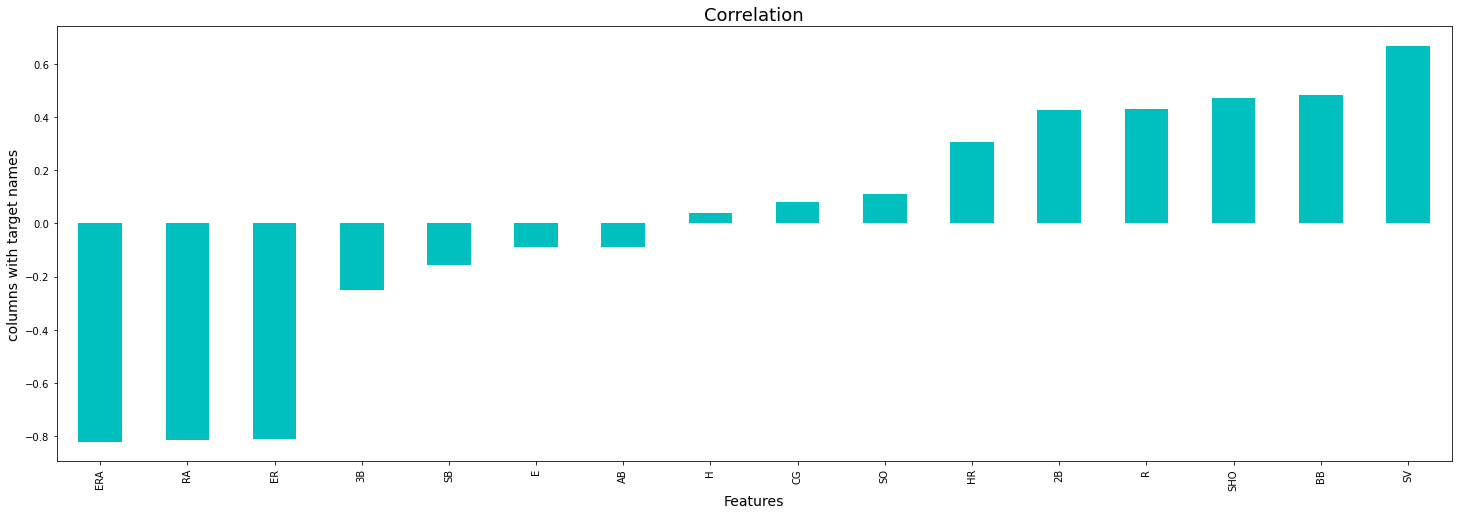

In [78]:
plt.figure(figsize=(25,8))
df.corr()['W'].sort_values(ascending=True).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [ ]:
#we can interpret that wins has a good corr with SV,SHO,BB,2B,R
#as we have seen above ErA,ER,RA have negative relationship with win
#we can also see that these three have good relation ship with each other

In [79]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [80]:
df_new=power_transform(df)


df=pd.DataFrame(df_new,columns=df.columns)


C:\Users\91954\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [85]:
df.skew()

W     -0.027204
R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

In [82]:
#we have reduced the skewness and we are taking the threshold 0.25

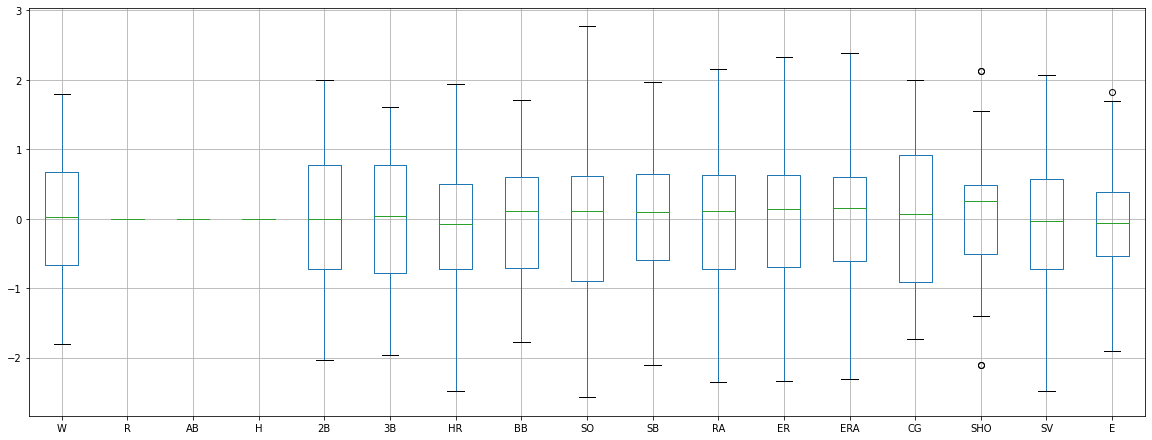

In [88]:
df.iloc[:,0:].boxplot(figsize=[20,9])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [89]:
#we dont see much outlier from this plot

In [90]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [91]:
#So as we have seen above no outlier

In [97]:
dfc=dfc.drop(['RA','ER','ERA'],axis=1)#we are droping as they show many istences of multicoliniarity

In [99]:
dfc.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [100]:
df2_new=power_transform(dfc)


dfc=pd.DataFrame(df2_new,columns=dfc.columns)


C:\Users\91954\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [101]:
dfc.skew()

W     -0.027204
R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

# model building

In [92]:
X=df.drop("W",axis=1)
Y=df['W']

In [106]:
x=dfc.drop("W",axis=1)
y=dfc['W']

In [107]:
sc=StandardScaler()# standerdizing the data
x=sc.fit_transform(x)
x


array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.35984364,
        -0.78957937,  1.546378  , -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308, -0.35984364,
         0.25177537,  0.36044386, -0.53221128],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 ,  1.99351257,
        -0.24539345, -0.6075936 , -1.34233137],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  1.22010317,
        -0.51075929, -0.76445333,  0.67852361],
       [ 0.        ,  0.        ,  0.        ,  0.79218291,  1.61644394,
        -0.3298501 , -0.20677062,  0.08545863,  0.07962852,  1.22010317,
         0.25177537, -1.09501024, -0.53221128],
       [ 0.        ,  0.      

In [108]:
lr=LinearRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {r2_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.883466789837365
At random state0,the testing  accuracy is :- 0.05492354723853188


At random state1,the training accuracy is :- 0.776700054398062
At random state1,the testing  accuracy is :- 0.4519038400818265


At random state2,the training accuracy is :- 0.89742938771824
At random state2,the testing  accuracy is :- -0.7445495132482065


At random state3,the training accuracy is :- 0.8673262350543319
At random state3,the testing  accuracy is :- 0.06760764004949171


At random state4,the training accuracy is :- 0.9153003552116867
At random state4,the testing  accuracy is :- -1.189179158892817


At random state5,the training accuracy is :- 0.8379667993482247
At random state5,the testing  accuracy is :- -0.7184450458899505


At random state6,the training accuracy is :- 0.8945506434802194
At random state6,the testing  accuracy is :- 0.23345426785382972


At random state7,the training accuracy is :- 0.7901293828163194
At random state7,the test

In [109]:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is -2.7075928010450756 and accuracy score for training is 0.7886788771763155 and accuracy score for testing is -1.5327566428416324


At cross fold 3 the cv score is -0.33293855185740273 and accuracy score for training is 0.7886788771763155 and accuracy score for testing is -1.5327566428416324


At cross fold 4 the cv score is 0.0934087341083861 and accuracy score for training is 0.7886788771763155 and accuracy score for testing is -1.5327566428416324


At cross fold 5 the cv score is -0.46695442217370503 and accuracy score for training is 0.7886788771763155 and accuracy score for testing is -1.5327566428416324


At cross fold 6 the cv score is -0.26500696345495894 and accuracy score for training is 0.7886788771763155 and accuracy score for testing is -1.5327566428416324


At cross fold 7 the cv score is -0.3347386887098671 and accuracy score for training is 0.7886788771763155 and accuracy score for testing is -1.5327566428416324


At cross fold 8 the cv sco

In [112]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [111]:
from sklearn.model_selection import GridSearchCV

In [142]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=r2_score(Y_test,pred_decision)
print('r2_score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=6)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

r2_score: -80.97114489594513
cross_val_score: 7.329863801249971


In [115]:
from sklearn.neighbors import KNeighborsRegressor
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsRegressor()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 5}


In [132]:
kn= KNeighborsRegressor(n_neighbors=5,algorithm='kd_tree',leaf_size=10)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=r2_score(Y_test,pred_decision)
print('r2_score:',knn*100)
knscore=cross_val_score(kn,X,Y,cv=6)
knc=knscore.mean()
print('cross_val_score:',knc*100)

r2_score: -3.9832874217776926
cross_val_score: 18.09059140254802


In [119]:
from sklearn.ensemble import BaggingRegressor
parameters={'max_features':[1,2,3],'random_state':list(range(0,10))}
bg=BaggingRegressor()
clf=GridSearchCV(bg,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'max_features': 2, 'random_state': 2}


In [124]:
bg=BaggingRegressor(max_features=2,random_state=2)
bg.fit(X_train,Y_train)
bg.score(X_train,Y_train)
pred_decision=bg.predict(X_test)
bgg=r2_score(Y_test,pred_decision)
print('r2_score:',bgg*100)
bgscore=cross_val_score(bg,x,y,cv=6)
bgc=bgscore.mean()
print('cross_val_score:',bgc*100)

r2_score: -107.69516050178738
cross_val_score: 3.9145330279683552


In [125]:
from sklearn.tree import DecisionTreeRegressor

parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2', 'splitter': 'best'}


C:\Users\91954\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91954\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91954\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\91954\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 168, in fit
    raise ValueError("Some value(s) of y are negative which is"
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91954\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this tr

In [127]:
dt=DecisionTreeRegressor(criterion="mae",splitter="best",max_features="log2")
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
pred_decision=dt.predict(X_test)
dtt=r2_score(Y_test,pred_decision)
print('r2_score:',dtt*100)
dtscore=cross_val_score(dt,X,Y,cv=6)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

r2_score: -408.4185853727596
cross_val_score: -86.02367539647702


In [ ]:
#we can see randiomrainforest is giving the best score

In [143]:
filename='baseball.pkl'
pickle.dump(rf,open(filename,'wb'))

In [144]:
loaded_model=pickle.load(open('baseball.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

-0.8097114489594512


In [145]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11
Predicted,0.718746,0.427921,-0.065669,-0.270298,-0.236437,0.378449,-0.091111,0.345995,0.271691,0.528463,0.572642,0.037754
Original,0.718746,0.427921,-0.065669,-0.270298,-0.236437,0.378449,-0.091111,0.345995,0.271691,0.528463,0.572642,0.037754


In [ ]:
#we conclude our model